## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5, 0.7, 0.95]

In [7]:
import itertools

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1083 - acc: 0.2243 - val_loss: 2.0856 - val_acc: 0.2556
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8504 - acc: 0.3323 - val_loss: 1.8398 - val_acc: 0.3331
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7793 - acc: 0.3599 - val_loss: 1.6849 - val_acc: 0.3982
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6954 - acc: 0.3920 - val_loss: 2.3860 - val_acc: 0.2242
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6854 - acc: 0.3970 - val_loss: 1.6453 - val_acc: 0.4057
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.5993 - acc: 0.4256 - val_loss: 1.6267 - val_acc: 0.4186
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5690 - acc: 0.4385 - val_loss: 1.6707 - 

Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8856 - acc: 0.3016 - val_loss: 1.8880 - val_acc: 0.3080
Epoch 3/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8293 - acc: 0.3272 - val_loss: 1.8147 - val_acc: 0.3428
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7772 - acc: 0.3531 - val_loss: 1.8241 - val_acc: 0.3259
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7451 - acc: 0.3714 - val_loss: 1.7175 - val_acc: 0.3774
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7062 - acc: 0.3894 - val_loss: 1.7054 - val_acc: 0.3909
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6850 - acc: 0.3987 - val_loss: 1.8318 - val_acc: 0.3702
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6715 - acc: 0.4047 - val_loss: 1.7565 - val_acc: 0.3808
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 4s 85us/step - loss: 1.7440 - acc: 0.3847 - val_loss: 1.7085 - val_acc: 0.4003
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6913 - acc: 0.4058 - val_loss: 1.6813 - val_acc: 0.4010
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6508 - acc: 0.4166 - val_loss: 1.7568 - val_acc: 0.3791
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6159 - acc: 0.4319 - val_loss: 1.6100 - val_acc: 0.4285
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5830 - acc: 0.4426 - val_loss: 1.5765 - val_acc: 0.4400
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5579 - acc: 0.4513 - val_loss: 1.6177 - val_acc: 0.4245
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5373 - acc: 0.4592 - val_loss: 1.9040 - val_acc: 0.3436
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 84us/step - loss: 1.6137 - acc: 0.4311 - val_loss: 1.7569 - val_acc: 0.3731
Epoch 5/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5731 - acc: 0.4451 - val_loss: 1.6917 - val_acc: 0.3877
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5365 - acc: 0.4571 - val_loss: 1.5717 - val_acc: 0.4382
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5039 - acc: 0.4684 - val_loss: 1.5591 - val_acc: 0.4437
Epoch 8/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4748 - acc: 0.4792 - val_loss: 1.4836 - val_acc: 0.4733
Epoch 9/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4487 - acc: 0.4865 - val_loss: 1.6534 - val_acc: 0.4080
Epoch 10/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4206 - acc: 0.4987 - val_loss: 1.4342 - val_acc: 0.4906
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 85us/step - loss: 1.4009 - acc: 0.5049 - val_loss: 1.4742 - val_acc: 0.4685
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3627 - acc: 0.5156 - val_loss: 1.4182 - val_acc: 0.4871
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3206 - acc: 0.5311 - val_loss: 1.4147 - val_acc: 0.4961
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2879 - acc: 0.5445 - val_loss: 1.3719 - val_acc: 0.5151
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.2601 - acc: 0.5540 - val_loss: 1.4213 - val_acc: 0.5005
Epoch 10/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.2289 - acc: 0.5637 - val_loss: 1.4399 - val_acc: 0.4904
Epoch 11/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2010 - acc: 0.5746 - val_loss: 1.3721 - val_acc: 0.5195
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 4s 82us/step - loss: 1.9151 - acc: 0.3297 - val_loss: 1.9034 - val_acc: 0.3364
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8905 - acc: 0.3405 - val_loss: 1.8813 - val_acc: 0.3492
Epoch 8/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8703 - acc: 0.3482 - val_loss: 1.8633 - val_acc: 0.3486
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8531 - acc: 0.3545 - val_loss: 1.8474 - val_acc: 0.3580
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8381 - acc: 0.3596 - val_loss: 1.8352 - val_acc: 0.3580
Epoch 11/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8248 - acc: 0.3642 - val_loss: 1.8203 - val_acc: 0.3668
Epoch 12/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8126 - acc: 0.3684 - val_loss: 1.8093 - val_acc: 0.3738
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 4s 82us/step - loss: 1.8000 - acc: 0.3718 - val_loss: 1.7880 - val_acc: 0.3824
Epoch 8/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7786 - acc: 0.3795 - val_loss: 1.7716 - val_acc: 0.3858
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7601 - acc: 0.3876 - val_loss: 1.7559 - val_acc: 0.3837
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7435 - acc: 0.3911 - val_loss: 1.7397 - val_acc: 0.3925
Epoch 11/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7290 - acc: 0.3972 - val_loss: 1.7259 - val_acc: 0.3970
Epoch 12/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7146 - acc: 0.4024 - val_loss: 1.7099 - val_acc: 0.4041
Epoch 13/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7020 - acc: 0.4072 - val_loss: 1.7040 - val_acc: 0.4041
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 81us/step - loss: 1.5193 - acc: 0.4671 - val_loss: 1.5223 - val_acc: 0.4622
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4910 - acc: 0.4764 - val_loss: 1.5128 - val_acc: 0.4681
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4680 - acc: 0.4848 - val_loss: 1.5133 - val_acc: 0.4620
Epoch 11/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4428 - acc: 0.4925 - val_loss: 1.4777 - val_acc: 0.4728
Epoch 12/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4204 - acc: 0.5004 - val_loss: 1.4634 - val_acc: 0.4805
Epoch 13/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3993 - acc: 0.5058 - val_loss: 1.4427 - val_acc: 0.4875
Epoch 14/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3789 - acc: 0.5150 - val_loss: 1.4523 - val_acc: 0.4854
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 4s 82us/step - loss: 2.1862 - acc: 0.2267 - val_loss: 2.1821 - val_acc: 0.2271
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1741 - acc: 0.2335 - val_loss: 2.1703 - val_acc: 0.2351
Epoch 11/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1626 - acc: 0.2401 - val_loss: 2.1591 - val_acc: 0.2411
Epoch 12/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1515 - acc: 0.2450 - val_loss: 2.1483 - val_acc: 0.2464
Epoch 13/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1408 - acc: 0.2498 - val_loss: 2.1379 - val_acc: 0.2489
Epoch 14/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.1306 - acc: 0.2538 - val_loss: 2.1279 - val_acc: 0.2536
Epoch 15/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.1207 - acc: 0.2584 - val_loss: 2.1183 - val_acc: 0.2565
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 82us/step - loss: 2.1026 - acc: 0.2491 - val_loss: 2.0978 - val_acc: 0.2478
Epoch 11/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0884 - acc: 0.2539 - val_loss: 2.0841 - val_acc: 0.2531
Epoch 12/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0751 - acc: 0.2590 - val_loss: 2.0713 - val_acc: 0.2549
Epoch 13/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0628 - acc: 0.2636 - val_loss: 2.0595 - val_acc: 0.2626
Epoch 14/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0514 - acc: 0.2699 - val_loss: 2.0483 - val_acc: 0.2709
Epoch 15/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0406 - acc: 0.2754 - val_loss: 2.0379 - val_acc: 0.2761
Epoch 16/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0304 - acc: 0.2806 - val_loss: 2.0279 - val_acc: 0.2801
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 106us/step - loss: 1.8218 - acc: 0.3624 - val_loss: 1.8176 - val_acc: 0.3652
Epoch 12/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8088 - acc: 0.3696 - val_loss: 1.8064 - val_acc: 0.3635
Epoch 13/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7977 - acc: 0.3730 - val_loss: 1.7953 - val_acc: 0.3729
Epoch 14/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7868 - acc: 0.3764 - val_loss: 1.7849 - val_acc: 0.3777
Epoch 15/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7764 - acc: 0.3811 - val_loss: 1.7760 - val_acc: 0.3776
Epoch 16/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7668 - acc: 0.3843 - val_loss: 1.7659 - val_acc: 0.3839
Epoch 17/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7574 - acc: 0.3888 - val_loss: 1.7573 - val_acc: 0.3887
Epoch 18/50
50000/50000 [====================

50000/50000 [==============================] - 4s 81us/step - loss: 2.2595 - acc: 0.1718 - val_loss: 2.2599 - val_acc: 0.1680
Epoch 13/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2564 - acc: 0.1739 - val_loss: 2.2568 - val_acc: 0.1708
Epoch 14/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2533 - acc: 0.1764 - val_loss: 2.2538 - val_acc: 0.1736
Epoch 15/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2504 - acc: 0.1789 - val_loss: 2.2510 - val_acc: 0.1763
Epoch 16/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2476 - acc: 0.1813 - val_loss: 2.2482 - val_acc: 0.1795
Epoch 17/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2448 - acc: 0.1841 - val_loss: 2.2455 - val_acc: 0.1809
Epoch 18/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2421 - acc: 0.1857 - val_loss: 2.2428 - val_acc: 0.1840
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 80us/step - loss: 2.2714 - acc: 0.1428 - val_loss: 2.2681 - val_acc: 0.1404
Epoch 14/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2673 - acc: 0.1448 - val_loss: 2.2641 - val_acc: 0.1425
Epoch 15/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2633 - acc: 0.1467 - val_loss: 2.2602 - val_acc: 0.1442
Epoch 16/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2595 - acc: 0.1490 - val_loss: 2.2564 - val_acc: 0.1472
Epoch 17/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2559 - acc: 0.1513 - val_loss: 2.2529 - val_acc: 0.1494
Epoch 18/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.2524 - acc: 0.1533 - val_loss: 2.2494 - val_acc: 0.1517
Epoch 19/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2489 - acc: 0.1555 - val_loss: 2.2460 - val_acc: 0.1548
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 80us/step - loss: 2.1383 - acc: 0.2516 - val_loss: 2.1327 - val_acc: 0.2574
Epoch 15/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1285 - acc: 0.2566 - val_loss: 2.1231 - val_acc: 0.2598
Epoch 16/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1189 - acc: 0.2590 - val_loss: 2.1138 - val_acc: 0.2629
Epoch 17/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1097 - acc: 0.2622 - val_loss: 2.1050 - val_acc: 0.2653
Epoch 18/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1010 - acc: 0.2650 - val_loss: 2.0964 - val_acc: 0.2684
Epoch 19/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0925 - acc: 0.2687 - val_loss: 2.0882 - val_acc: 0.2710
Epoch 20/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0843 - acc: 0.2707 - val_loss: 2.0800 - val_acc: 0.2746
Epoch 21/50
50000/50000 [=====================

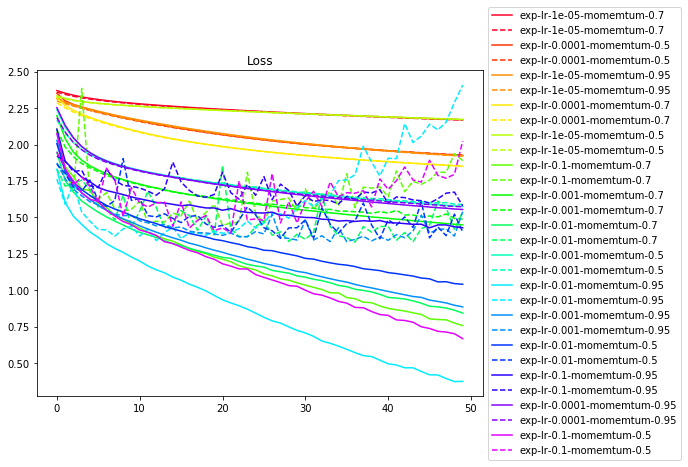

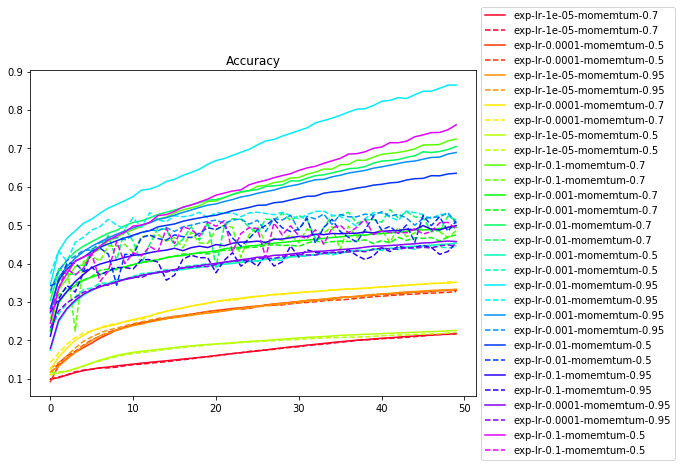

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colors = len(results.keys())
clr = plt.get_cmap('gist_rainbow')
color_bar = [clr(1.*i/colors) for i in range(colors)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()